<a href="https://colab.research.google.com/github/Menghuo-Lay/predict-happiness/blob/main/Python_Final_Project_Code_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.kdischool.ac.kr/www/img/sub/sub_a10108010000_logo1.png" alt="Drawing
">

# **"Machine Learning: Predicting Happiness or Subjective Wellbeing (SWB) based on World Happiness Report Predictors."**

**By: MENGHUO, LAY (ID: 202312058)**

**Date: 22, November, 2023**

## **Abstract**

One of the ultimate goal of development is to improve the population well-being and happiness. Unlike economic indicators, this concept is very tricky to measure objectively. According to World Happiness Report 2023 findings, there are 8 factors strongly associate with subjective happiness (SWB) score. Building on this finding, this study seeks to build a machine learning algorithm to predict the quality of life based on mentioned factors as predictors such as: GDP per capita, social support, healthy life expectency, etc. First, I gather the data of many different countries from World Happiness Report 2023 (the time peroid is from 2005-2022). Second, I process the data by filling the missing value using interpolation and standardize all predictors to ensure equal contribution weigh to the mode. Third, I ran first layer regression using LASSO algorithm to perform features selection. Fourth, the selected features are fit into 2 machine learning models: (i) K-Nearest Neighbour (KNN) to predict quality of life that scale on 1-10 level; (ii) Decision Tree to predict quality of life category.

## **1. Research Motivation & Questions**

### **1.1. Research Motivation**

Over the last few years, there are increasingly more focus shifted toward happiness or subjective wellbeing of people around the world. Happiness or SWB is arguably one of the ultimate goal of development as other development indicators such as GDP and Human Development Index are intended to improve quality of life or population well being. However, it is very tricky to measure happiness level and can't be estimated like qunatitative indicators (GDP, inflation, export value, etc.). Currently, the data on happiness score are measured through survey in different countries around the world by World Happiness Report, which is costly and repetitive (surveys are conducted in many waves to record score in different years). This process is tidious and require much time to obtain the score.  

On the other hand, with the advancement of data driven machine learning approaches in various areas and topics, this can be deployed to predict happiness score in the future without spending time and financial resources to conduct the survey frequently. Annually, World Happiness Report releases a ranking of countries in term of happiness score based on various indicators, including GDP per capita, social support, life expectancy, freedom to make life choices, generosity, perceptions of corruption, positive affect, and negative affect emotion. Using these factors, I can build a predicting model using above predictors and existing survey data to fit into the model. This study will be beneficial for policymaker to have estimate beforehand and spend less time and resources to conduct the survey.

<img src="https://static.vecteezy.com/system/resources/previews/005/356/432/large_2x/silhouette-children-playing-happy-time-at-sunset-free-photo.jpg" alt="Drawing" style="width:128px;height:32px">

### **1.2. Research Questions**

This study aim to answer the **main research** questions as following:
1. What are the important features that can be used to predict happiness or SWB of countries around the world?
2. What is the accuracy for machine learning model to predict the happiness or SWB using only important features?

## **2. Data Selection**

In predicting the happiness score of different country over the years can be tricky as there are thousands of features that might influence the outcome variable. With this limitation coonsidered, this study will base on the predictors from `World Happiness Report 2023` research findings and `Our World in Data`, which has 1 label (outcome variable) and 9 predictors (independent variables) as following:

<html>
<head>
<style>
table {
  font-family: helvetica, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
</head>
<body>

<h4>Table 1. Variables Definition & Source</h4>

<table>
  <tr>
    <th style = "text-align: left;">Variables</th>
    <th style = "text-align: left;">Definition</th>
    <th style = "text-align: left;">Extract from</th>
  </tr>
  <tr>
    <td style = "text-align: left;">
        <b>Label (y)</b>
    </td>
  <th style = "text-align: left;"></th>
  <th style = "text-align: left;"></th>
  </tr>
  <tr>
    <td style = "text-align: left;">Life Ladder</td>
    <td style = "text-align: left;">Happiness score or subjective well-being (SWB) collected from SWB survey conducted from 2005 to 2022. The figures are nation average scale from 0 to 10, in which 0 is represent the worst possible life and 10 is the best possible life.</td>
    <td style = "text-align: left;">World Happiness Report (2023)</td>
  </tr>
  <tr>
    <td style = "text-align: left;">
        <b>Features (X)</b>
    </td>
    <th style = "text-align: left;"></th>
    <th style = "text-align: left;"></th>
  </tr>
  <tr>
    <td style = "text-align: left;">GDP per capita</td>
    <td style = "text-align: left;">Purchasing Power Parity (PPP) meausure in 2017 USD, in accordance  World Development Indicators (WDI).</td>
    <td style = "text-align: left;">World Happiness Report (2023)</td>
  </tr>
  <tr>
    <td style = "text-align: left;">Social Support</td>
    <td style = "text-align: left;">Having someone to count on in times of trouble is measured by taking national average of the binary responses (either 0 or 1) to the GWP question “If you
were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”
      </td>
    <td style = "text-align: left;">World Happiness Report (2023)</td>
  </tr>
   <tr>
    <td style = "text-align: left;">Healthy life expectancy at birth</td>
    <td style = "text-align: left;">Extracted from the World Health Organization’s (WHO) Global Health Observatory data repository (Last updated: 2020-12-04). The data at the source are available for the years 2000, 2010, 2015 and 2019. To match this report’s sample period (2005-2021), interpolation and extrapolation are used.
      </td>
  <td style = "text-align: left;">World Happiness Report (2023)</td>
  </tr>
  <tr>
    <td style = "text-align: left;">Freedom to make life choices</td>
    <td style = "text-align: left;">National average of responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”</td>
    <td style = "text-align: left;">World Happiness Report (2023)</td>
  </tr>
  <tr>
    <td style = "text-align: left;">Generosity</td>
    <td style = "text-align: left;">Residual of regressing national average of response to the GWP
question “Have you donated money to a charity in the past month?” on GDP per capita.</td>
    <td style = "text-align: left;">World Happiness Report (2023)</td>
  </tr>
  <tr>
    <td style = "text-align: left;">Corruption Perception</td>
    <td style = "text-align: left;">National average of the survey responses to the GWP: “Is corruption widespread throughout the government or not” and “Is corruption widespread within businesses or not?”</td>
    <td style = "text-align: left;">World Happiness Report (2023)</td>
  </tr>
  <tr>
    <td style = "text-align: left;">Positive affect</td>
    <td style = "text-align: left;">The average of three positive affect measures in GWP: laugh, enjoyment and doing interesting things in the Gallup World Poll waves 3-7. </td>
    <td style = "text-align: left;">World Happiness Report (2023)</td>
  </tr>
  <tr>
    <td style = "text-align: left;">Negative affect</td>
    <td style = "text-align: left;">The average of three negative affect measures in GWP: worry, sadness and anger in the Gallup World Poll waves 3-7.</td>
    <td style = "text-align: left;">World Happiness Report (2023)</td>
  </tr>
  <tr>
    <td style = "text-align: left;">Median age</td>
    <td style = "text-align: left;">The median age divides the population into two parts of equal size; that is, there are as many people with ages above the median age as there are with ages below, in accordance to United Nations, World Population Prospects (2022). </td>
    <td style = "text-align: left;">Our World in Data</td>
  </tr>
</table>

</body>
</html>

**Reference:** John et al., 2023

These predictors are regarded as the most significant independent variables in determine the happiness and SWB of people. Using these highly relevant features, the data feed into the machine algorithm will be more accurate and less affected by noises.

### **2.1. Merge the dataset**

Above dataset are available from 2 sources here.
- `whr`: https://happiness-report.s3.amazonaws.com/2023/DataForTable2.1WHR2023.xls
- `age`: https://ourworldindata.org/grapher/median-age

In this section, both dataset are merged together based on country and year as unit of analysis. `whr` is considered as the main dataset for merging reference as it contains the label (y). The merging was done using `pandas` library in Jupyter Notebook. Below is the full code for recreational purposes.

**NOTE:**
For readability, all libraries and functions used in this paper will be stored here.

In [65]:
pip install pycountry_convert

In [66]:
# library for data manipulation
import pandas as pd
import numpy as np
import pycountry_convert as pc
import math

# library for visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import warnings
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from IPython.display import Image
import plotly.express as px

# library for machine learning
from sklearn.preprocessing import QuantileTransformer, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
import pickle

# library for prediction score metric
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [67]:
# functions for adding continent to the dataset
def convert(row):
    cn_code = pc.country_name_to_country_alpha2(row.Country, cn_name_format = 'Default')
    conti_code = pc.country_alpha2_to_continent_code(cn_code)
    return conti_code

# function to make prediction using machine learning model
def make_prediction(model, features):
    label = model.predict([features])[0]
    return label

# function for decision tree classifier
def main():
  while True:
    try:
        feature1 = math.log(float(input("Enter GDP per capita value here: ")))
        if 3 <= feature1 <= 13:
            break
        else:
            print("Value out of bounds. Please try again.")

    except ValueError:
        print("Wrong format. Please enter a number.")

  while True:
    try:
        feature3 = float(input("Enter Life Expectancy: "))
        if 0 <= feature3 <= 100:
            break
        else:
            print("Value out of bounds. Please try again.")
    except ValueError:
        print("Wrong format. Please enter a number.")

  while True:
    try:
        feature2 = float(input("Enter Social Support: "))/100
        feature4 = float(input("Enter Perception of Corruption: "))/100
        feature5 = float(input("Enter Positive Affect: "))/100
        if 0 <= feature2 <= 1 and 0 <= feature4 <= 1 and 0 <= feature5 <= 1:
            break
        else:
            print("Value out of bounds. Please try again.")

    except ValueError:
        print("Wrong format. Please enter a number.")

  while True:
    try:
        model_map = {'knn': knn, 'decision tree': dtree}
        model = str(input("Enter model name: ")).lower()
        if model == 'knn' or model == 'decision tree':
            selected_model = model_map.get(model)
            break
        else:
            print("Model not found. Please try again.")

    except ValueError:
        print("Wrong format. Please enter a model name.")

  features = [feature1, feature2, feature3, feature4, feature5]
  prediction = make_prediction(selected_model, features)

  if selected_model == knn:
    print(f'Your happiness score is: {prediction}')
  else:
    print(f'Your happiness category is: {prediction}')

**Step 1:** Import the dataset

In [68]:
# import the raw dataset
whr = pd.read_csv("https://raw.githubusercontent.com/Menghuo-Lay/predict-happiness/main/DataForTable2.1WHR2023.csv")
age = pd.read_csv("https://raw.githubusercontent.com/Menghuo-Lay/predict-happiness/main/median-age.csv")

**Step 2:** Inspect dataset structure and match the common columns' name

In [69]:
# check the whr dataset structure
whr.head(1)

# rename the columns' name as appropriate
whr_final = whr.rename(columns = {'year': 'Year', 'Country name': 'Country'})

# recheck the whr dataset
print(f'Variables:{whr_final.shape[1]}, Observations:{whr_final.shape[0]}')
whr_final.head(3)

Variables:11, Observations:2199


,Country,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275


In [70]:
# check the age dataset structure
age.head(1)

# since there are 2 columns for median age (to specify source)
# let's create new columns which is mean of the 2 columns
age['Median age'] = np.nanmean(age[['Median age - Sex: all - Age: all - Variant: estimates',
                                   'Median age - Sex: all - Age: all - Variant: medium']], axis = 1)

# drop the 2 original columns that's no longer needed
age_drop = age.drop(age[['Median age - Sex: all - Age: all - Variant: estimates',
             'Median age - Sex: all - Age: all - Variant: medium']], axis = 1)

# rename the columns' name as appropriate
age_final = age_drop.rename(columns = {'Entity':'Country'})

# recheck the age dataset
print(f'Variables:{age_final.shape[1]}, Observations:{age_final.shape[0]}')
age_final.head(3)

Variables:4, Observations:38505


,Country,Code,Year,Median age
0,Afghanistan,AFG,1950,18.4
1,Afghanistan,AFG,1951,18.4
2,Afghanistan,AFG,1952,18.4


**Step 3:** Merge the data using `pd.merge()`

In [71]:
# merge the data base on country and year
merge_df = pd.merge(whr_final, age_final, how = 'left',
                    on = ['Country', 'Year'])

**Step 4:** Add continent code for more visualize options

In [72]:
# rename some countries to ISO recognized
merge_df['Country'] = merge_df['Country'].replace({'Turkiye': 'Turkey',
                                                   'Congo (Brazzaville)': 'Congo',
                                                  'Congo (Kinshasa)': 'Congo',
                                                  'Hong Kong S.A.R. of China': 'Hong Kong',
                                                  'Kosovo': 'Serbia',
                                                   'Somaliland region': 'Somaliland',
                                                  'State of Palestine': 'Palestine',
                                                  'Taiwan Province of China': 'Taiwan'})

# add the continent classification to the merge dataset
merge_df['Continent'] = merge_df.apply(convert, axis = 1)

# rename the code name to full name
continent_list = {'AS': 'Asia', 'SA': 'South America',
                 'OC': 'Oceania', 'EU': 'Europe',
                 'NA': 'North America', 'AF': 'Africa'}

merge_df['Continent'] = merge_df['Continent'].map(continent_list)

# check if the continent matched
print(f'Variables:{merge_df.shape[1]}, Observations:{merge_df.shape[0]}')
merge_df.head(3)

Variables:14, Observations:2199


,Country,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Code,Median age,Continent
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.168,0.882,0.414,0.258,AFG,14.0,Asia
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.191,0.850,0.481,0.237,AFG,14.3,Asia
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.121,0.707,0.517,0.275,AFG,14.4,Asia


## **3. Data Processing & Description**

### **3.1. Data Structure and Biases**

**Step 1:** Remove unit of analysis and build descriptive stats

In [73]:
# drop unit of analysis from dataframe
desc_df = merge_df.drop(columns = ['Country', 'Code', 'Year', 'Continent'])

# descriptive statistics summary
data_types = desc_df.dtypes.unique()           # check data types
desc_stats = desc_df.describe()                # check descriptive stats
skew_values = desc_df.skew()                   # check skewness
desc_stats.loc['skew'] = skew_values

# print the result
print(f'Data types:{str(data_types)}.')
round(desc_stats.T, 3)

Data types:[dtype('float64')].


,count,mean,std,min,25%,50%,75%,max,skew
Life Ladder,2199.0,5.479,1.126,1.281,4.647,5.432,6.310,8.019,-0.018
Log GDP per capita,2179.0,9.390,1.153,5.527,8.500,9.499,10.374,11.664,-0.335
Social support,2186.0,0.811,0.121,0.228,0.747,0.836,0.905,0.987,-1.119
Healthy life expectancy at birth,2145.0,63.295,6.901,6.720,59.120,65.050,68.500,74.475,-1.145
Freedom to make life choices,2166.0,0.748,0.140,0.258,0.656,0.770,0.859,0.985,-0.671
Generosity,2126.0,0.000,0.161,-0.338,-0.112,-0.023,0.092,0.703,0.777
Perceptions of corruption,2083.0,0.745,0.186,0.035,0.688,0.800,0.869,0.983,-1.490
Positive affect,2175.0,0.652,0.106,0.179,0.572,0.663,0.738,0.884,-0.436
Negative affect,2183.0,0.271,0.087,0.083,0.208,0.261,0.323,0.705,0.731
Median age,2104.0,28.996,9.111,13.800,21.000,28.200,37.900,48.700,0.076


Base on the tables above, the unit of analysis is at country and year level. The label (y) and 9 features (X) are measured in continuous values with positive mean, min, and max values; execpt the feature `Generosity`. These continuous variables are fit for various machine learning approaches that satisfied the research motivation and questions. In machine learning principle, the main interest remains on the label (y) rather than the feature (X). Hence, in selecting machine learning approach, we will need to further study the nature of label (y).

However, there are 3 potential biases when fitting unclean data to the algorithm, namely:
1. Missingness: based off the full observations of 2,199 from `Life Ladder`, there are some missing data in all features (see above table in `count` column). There are 2 main considerations for this potential bias, the pattern of missingness is either by random or systemetic. Details discussion and approach to solve this is in **Missingness** section.

2. Inequal Scaling: machine learning algorithms to be deployed in this study are somewhat sensitive to different scaling level. For example, `Median age` and `Healthy life expectancy at birth` are scale in high value compare to the rest. Without standardizing the scale for all features, this could lead to model contribution bias for some model. Deatils on this is in **Outliers and Scale** section.

3. Outliers: base off how far spread `min` and `max` values are from the `mean` value; and looking at the `skewness` value, outliers can be identified. For example, feature: `Perceptions of corruption`, has relatively high negative `skew` with very low `min` value, suggesting some outliers appear at the left tail of the distribution. Details graph and analysis on this bias is in **Outliers and Scale** section.

**Step 2:** Plot the distribution for label (y)

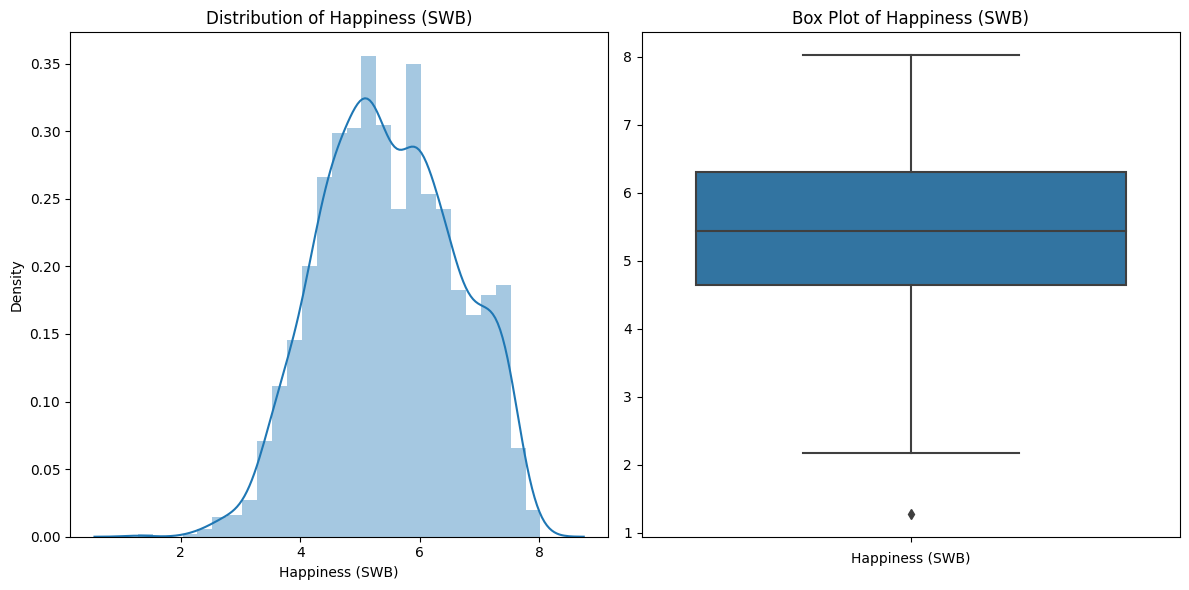

In [112]:
# create a figure with two subplots
warnings.filterwarnings("ignore")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# density plot of the label (y)
label = merge_df['Life Ladder']

sns.distplot(label, ax = ax1)
ax1.set_title('Distribution of Happiness (SWB)')
ax1.set_xlabel('Happiness (SWB)')

# box plot for some of the features (X)
sns.boxplot(label, ax = ax2)
ax2.set_title('Box Plot of Happiness (SWB)')
ax2.set_xlabel('Happiness (SWB)')
ax2.set_xticklabels([])

plt.tight_layout()
plt.show()

Overall, the label (y) distribution seem fine with a few outlier on the left tail. This outlier will be handle in the next section.

### **3.2. Data Missingness**

**Step 3:** Plot the missing data heatmap

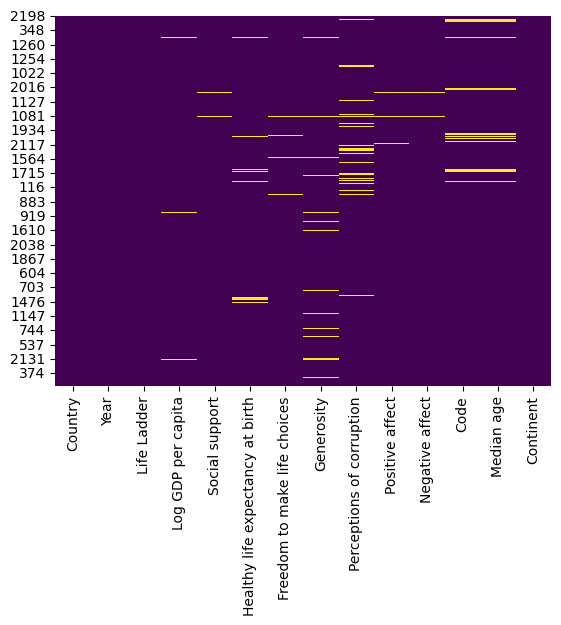

In [75]:
# sort to continents to see missing pattern in different region
sort_df = merge_df.sort_values(by = 'Continent',
                         ascending = True)

# plot the heatmap of missing data
sns.heatmap(sort_df.isnull(), cbar=False, cmap='viridis')
plt.show()

The heatmap above show that the missing seem to be distributed fairly more at the top which are mostly `Africa` and `Asia` countries. While there seem to be less missing among the lower observation which are `North and South America`. Clearly, the missingness pattern is not random and can't be dropped without affecting the model performance later. To deal with this, we can look at the correlation between variables and deplote interploate technique to fill missing data based off the highly correlated variables.

**Step 4:** Build correlation matrix

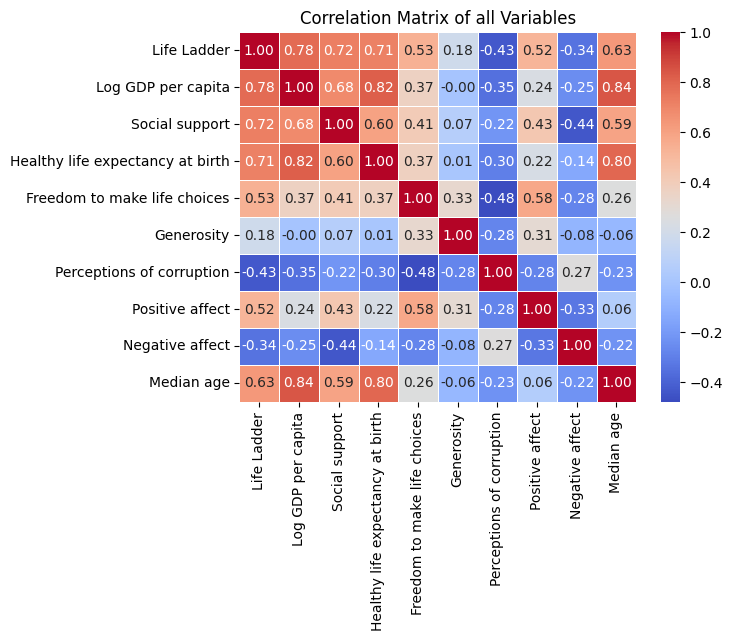

In [76]:
# using peasrson correlation
correlation = desc_df.corr(method = 'pearson')
sns.heatmap(correlation, cmap = "coolwarm",
            annot = True, fmt = "0.2f", linewidths = 0.5)
plt.title('Correlation Matrix of all Variables')

# Show the plot
plt.show()

Based on the heatmap above, with the exception of `Generosity`, most features (X) are highly correlated with the label (y). For instance, features: `Log GDP per capita`, `Social Support`, and `Healthy life expectancy` are highly correlated with `Life Ladder`, with correlation coefficient $r > 0.7$. While, `Freedom to make choices`, `Median age`, and so on are moderately correlated at $0.3 < r < 0.7$. In term of cross features, there are lesser correlated strength, however, most variables are fairly correlated. Hence, linear interpolation technique will be employed to fill in the missing value of the dataset.

**Step 5:** Fill in the data using `interploate()` function.

In [77]:
# interpolate the missing data using linear method
fill_df = merge_df.interpolate(method = 'linear', axis = 0)

# check if the NaN are filled
desc_fill = fill_df.describe()
min_observation = int(desc_fill.iloc[0].min())
print(f'The minimum observations among all variables: {min_observation}.')

The minimum observations among all variables: 2199.


**Step 6:** Check if the mean differences significant after NaN fill

In [78]:
# check mean differences filled vs initial
initial_mean = desc_stats.iloc[1,:]
fill_mean = desc_fill.iloc[1, 1:]
mean_dif = fill_mean - initial_mean

# print the result
pd.DataFrame(mean_dif).T

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Median age
mean,0.0,-0.003448,0.000244,-0.025333,0.000238,0.000389,-0.003622,-0.000395,0.000253,-0.141082


As table above suggest, the mean differences between initial dataset and filled dataset are not significantly different, hence, I will not perform t-test to seek the statistical significant of the differences since the value is neglegible. From here, I will proceed with the filled dataset for pattern analysis and model training.

### **3.3. Date Outliers and Scaling**

**Step 7:** Build some scatterplot to check the relationship outliers and scaling

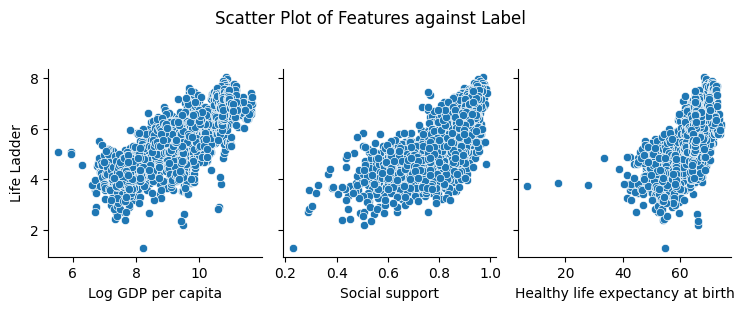

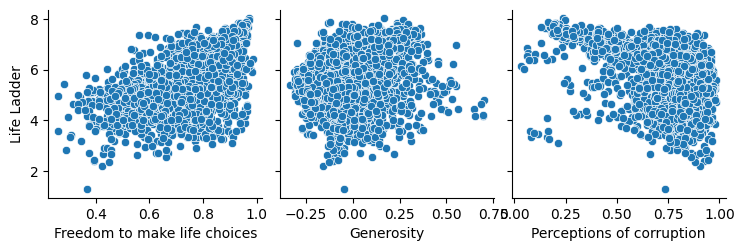

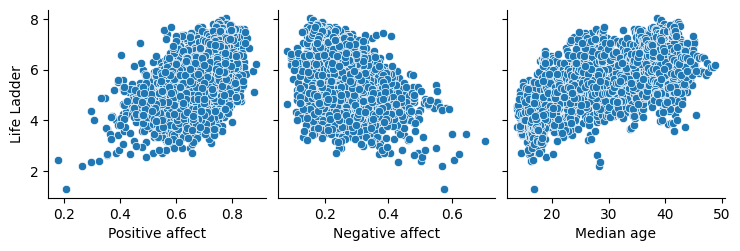

In [79]:
# establish feature variables
features1 = ['Log GDP per capita', 'Social support',
            'Healthy life expectancy at birth']

features2 = ['Freedom to make life choices',
            'Generosity','Perceptions of corruption']

features3 = ['Positive affect','Negative affect', 'Median age']

# establish the label variable
label = ['Life Ladder']

# create the scatter plot to check relation and outliers
warnings.filterwarnings("ignore")

sns.pairplot(fill_df, x_vars = features1, y_vars = label,
             kind = 'scatter', diag_kws = {'edgecolor': 'none'})
plt.suptitle("Scatter Plot of Features against Label", y=1.2)

sns.pairplot(fill_df, x_vars = features2,
             y_vars = label, kind = 'scatter')

sns.pairplot(fill_df, x_vars = features3,
             y_vars = label, kind = 'scatter')

plt.show()

The scatterplot above shows that there aren't much outliers in the dataset when pairing each feature with the label. In this case, I will assume that outliers doesn't impact much on the model performance later and only consider the scaling differences during model hyper-training.

### **3.4. Data Limitations**

In [80]:
# number of unqiue countries
unique_country = merge_df['Country'].unique()
num_country = len(unique_country)

# number of unique years
unique_year = merge_df['Year'].unique()
num_year = len(unique_year)

# print result
print(f'Full dataset: {num_country * num_year} observations from {num_country} countries over {num_year} years')
print(f'Collected dataset: {len(merge_df)} observations')

Full dataset: 2934 observations from 163 countries over 18 years
Collected dataset: 2199 observations


As the number above suggested, the full dataset should be 2916 observations, while the accessible data is only up to 2199 observations. Moreover, the figures are measured at country level annually instead of a more micro level such as by city/indivdual monthly. This mean the predicting model, will only be useful to anticipate the country level trend once a year, which can be too long for policy making decision. Therefore, further researches can focus more on in-depth level dataset, which has more observations (higher data availability leads to higher model accuracy).  

## **4. Analysis & Visualization**

### **4.1. Empirical patterns and associations**

**Graph 1:** Happiness (SWB) around the world over the years (2005-2022).

In [81]:
# # build a map graph to show quality of life around the world
year_df = fill_df.sort_values(by = 'Year')

fig = px.choropleth(year_df,
                    locations = 'Code',
                    color = 'Life Ladder',
                    hover_name = 'Code',
                    animation_frame = 'Year',
                    color_continuous_scale = px.colors.sequential.YlGnBu,
                    projection = 'natural earth')

# set layout properties
fig.update_layout(title_text = 'Happiness (SWB) by Country over the years',
                  geo = dict(showcoastlines = True, coastlinecolor = "Black"),
                  coloraxis_colorbar = dict(title = 'Happiness (SWB) score'),
                  height = 600, width = 800)

fig.show()

Click play button of to see the pattern of happiness over the world through out 2005 to 2022, the bolder the blue color the happier are the area. As we can see from the map infographic, Australia, North America and Europe always apprear in blue, indicating that people these regions are relatively happier than people in the region such as Africa and Asia. This clearly shows that happiness (SWB) does related to the country/region they are in. Notice by the color scaling on the right side, the maximum happiness (SWB) seems to decrease as the year progresses, indicating that people time might have negatively associate relationship with the happiness (SWB). Let's graph the happiness movement overtime to test this pattern further.

**Graph 2:** Happiness movement over time (2005-2022).

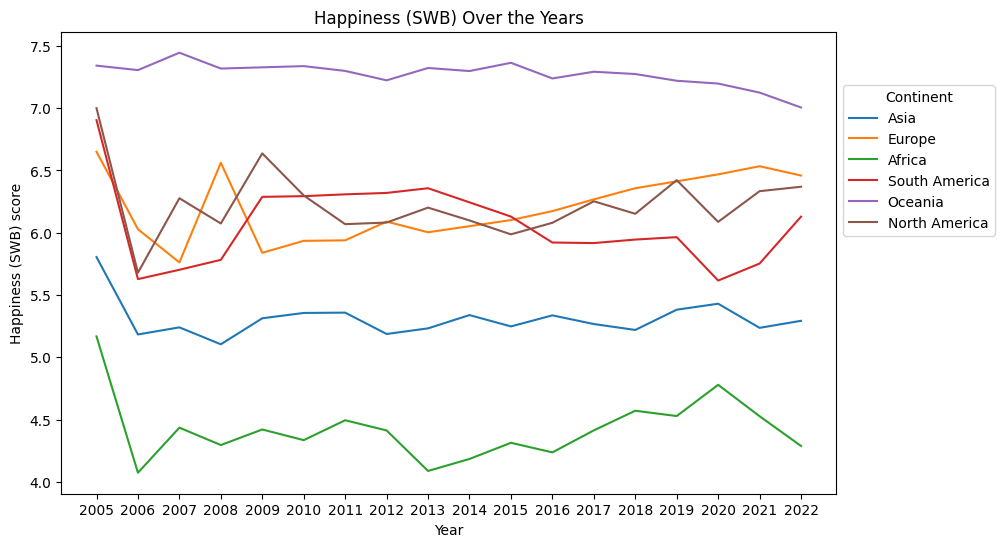

In [82]:
# create an average life quality trend by different continent
fill_df['Year'] = fill_df['Year'].astype(int)

plt.figure(figsize = (10, 6))
sns.lineplot(x = 'Year', y = 'Life Ladder', data = fill_df,
             hue = 'Continent', ci = None)

# set x-axis tick locations and labels to integers
plt.xticks(fill_df['Year'].unique(), [int(year) for year in fill_df['Year'].unique()])
plt.title('Happiness (SWB) Over the Years')
plt.ylabel('Happiness (SWB) score')
plt.legend(title = 'Continent', bbox_to_anchor = (1, 0.9))
plt.show()

The graph above suggest that all continents have relatively high happiness (SWB) level in 2005 and experienced a huge drop in 2006 before starting to recover fluctuately throughout the years. On the top, we noticed that Oceania maintained the highest happiness score for the whole peroid, while Europe, North America, and South America are somewhat close in the range of 5.5 to 7 happiness score. The 2 least happy continents over the years are Africa and Asia, with both currently stand at a lower score than it started in 2005.

**Graph 3:** Does wealthier countries have higher quality of life?

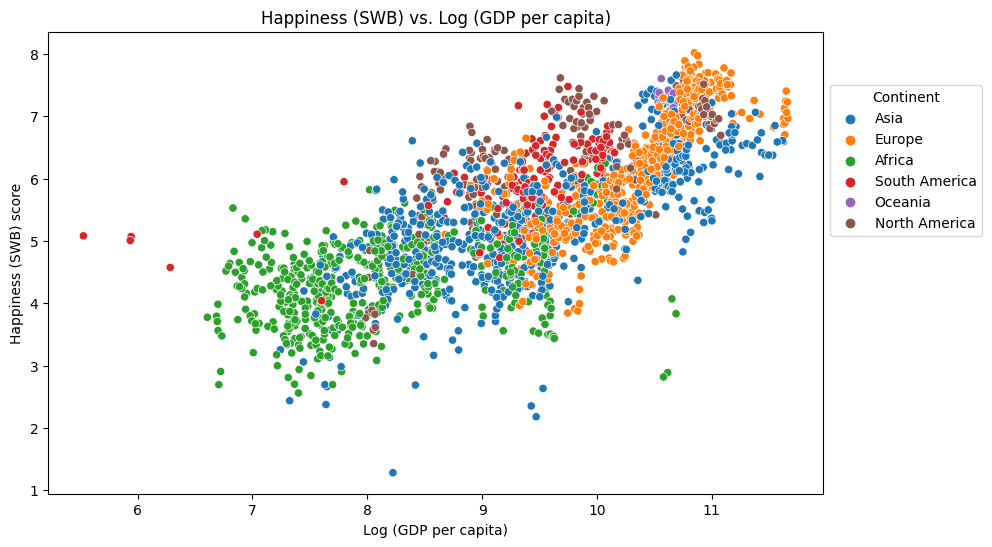

In [83]:
# create a scatter plot with regression lines for each time point
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Log GDP per capita', y = 'Life Ladder', data = fill_df,
                hue = 'Continent')

plt.title('Happiness (SWB) vs. Log (GDP per capita)')
plt.xlabel('Log (GDP per capita)')
plt.ylabel('Happiness (SWB) score')
plt.legend(title = 'Continent', bbox_to_anchor = (1, 0.9))
plt.show()

The scatter plot is a good tool in checking relationship of variables, in this case `Life Ladder` and `GDP per capita`. Since GDP per capita of each countries are relatively high gap, I used log function to scale down the gap impact and allow us to better see the pattern. According to the graph, it is very clear that, there is an upwards trend relationship. For instance, as the Log GDP per capita increases, the happiness level also increases.

**Graph 4:** Does younger population are happier than older population?

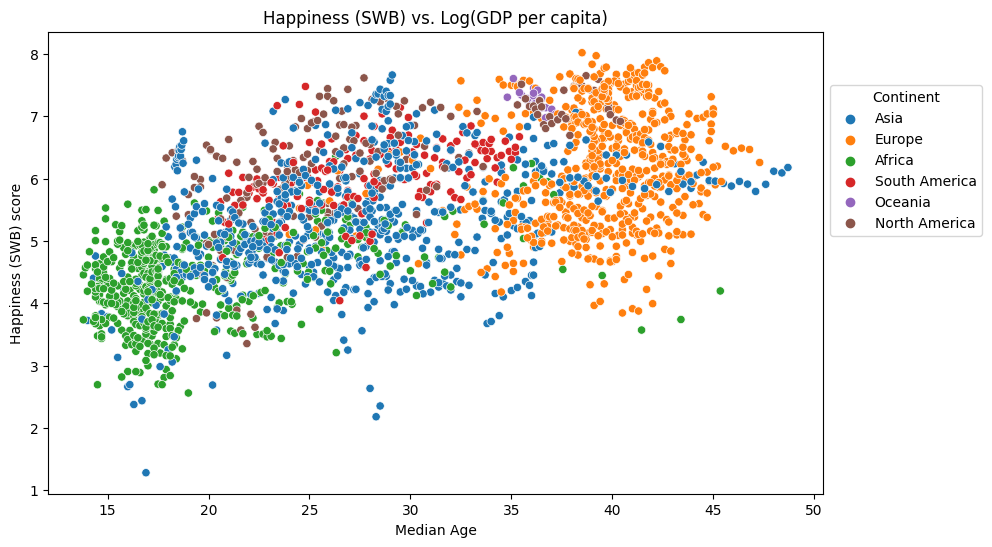

In [84]:
# create a scatter plot with regression lines for each time point
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Median age', y = 'Life Ladder', data = fill_df,
                hue = 'Continent')

plt.title('Happiness (SWB) vs. Log(GDP per capita)')
plt.xlabel('Median Age')
plt.ylabel('Happiness (SWB) score')
plt.legend(title = 'Continent', bbox_to_anchor = (1, 0.9))
plt.show()

We applied the same technique used in GDP per capita and Happiness pair. The overall trend also indicates a postive linear correlation between the pair. However, it is interesting to note that if we focus on each color separately, the linear relationship doesn't hold for all continents. For instance, Africa and Europe seem to have middle happiness score regardless the median age.  Other continents show more linear association than the 2 aforementioned continents.

**Graph 5:** Top 10 happiest countries in 2007 and Top 10 happiest countries 2022

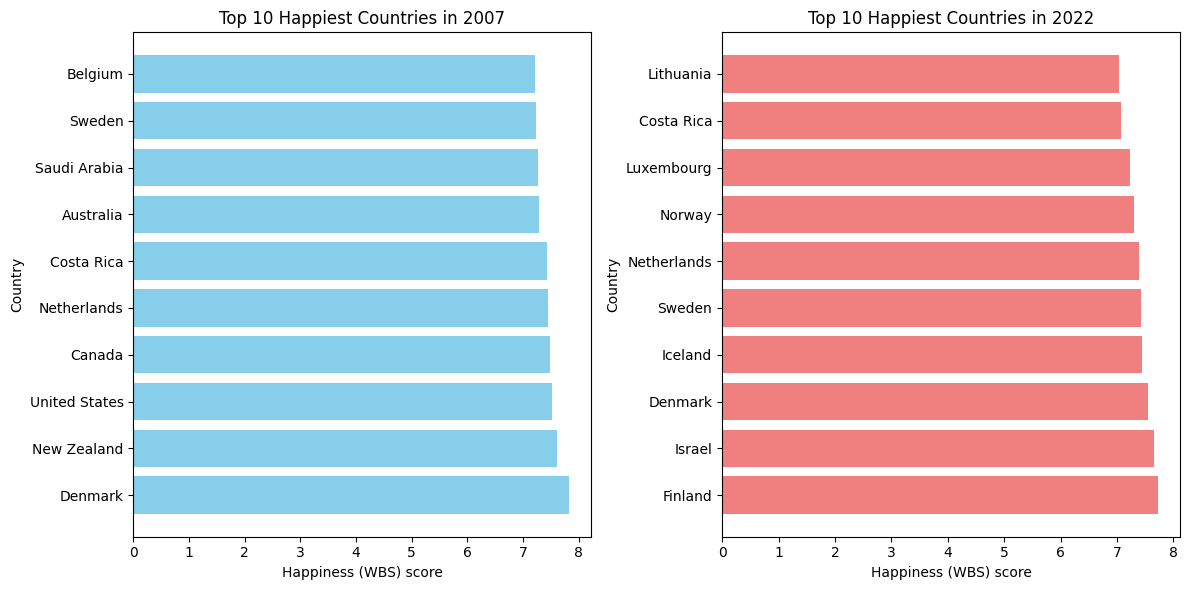

In [85]:
# filter the top 10 happiest countries in 2007 and 2022
top10_2007 = fill_df[fill_df['Year'] == 2007].nlargest(10, 'Life Ladder')
top10_2022 = fill_df[fill_df['Year'] == 2022].nlargest(10, 'Life Ladder')

plt.figure(figsize = (12, 6))

# plot for 2007
plt.subplot(1, 2, 1)
plt.barh(top10_2007['Country'], top10_2007['Life Ladder'], color = 'skyblue')
plt.title('Top 10 Happiest Countries in 2007')
plt.xlabel('Happiness (WBS) score')
plt.ylabel('Country')

# Plot for 2022
plt.subplot(1, 2, 2)
plt.barh(top10_2022['Country'], top10_2022['Life Ladder'], color = 'lightcoral')
plt.title('Top 10 Happiest Countries in 2022')
plt.xlabel('Happiness (WBS) score')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

This type of graph allows us to compare changes in top rank countries from the earlier year against the recent year. We can see that most countries appear as top rank in 2007 disappear, including Belgium, Saudi Arabia, Australia, Canada, United States, New Zealand (6 out of 10 countries). While the new countries appear included Mexico, Luxembourg, Norway, Iceland, Israel, Finland (4 out of 6 are European countries). It is fair to assume that happiness score tend to fluctuate and doesn't follow a constant linear model. Hence, I proposed to use machine learning algorithm to capture the non-linear trend of this label (y).

### **4.2. LASSO Algorithm**

The first stage of this study, will include feature selections in aim to reduce umimportant features and further simplify the model for better interpretibility. Considering the nature of the data, LASSO is the best approach for feature selection as it works well with continuous values features and consist of penalty term that help shrink the coefficient of the unimportant features to 0 or close to 0. Moreover, with LASSO, I can run cross-validation to find the best tuning parameter that give high model accuracy and low variance. Below is a summary of shrinkage models comparison: LASSO vs Ridge model.  

*Image source: Google Image*

<img src="https://pic2.zhimg.com/v2-57ac1ef909c96b50b2724b2eb28c90cd_r.jpg" alt="Drawing" style="width:256px;height:16px">

**Step 1:** Inital model training

Accuracy = 0.5258267376937247


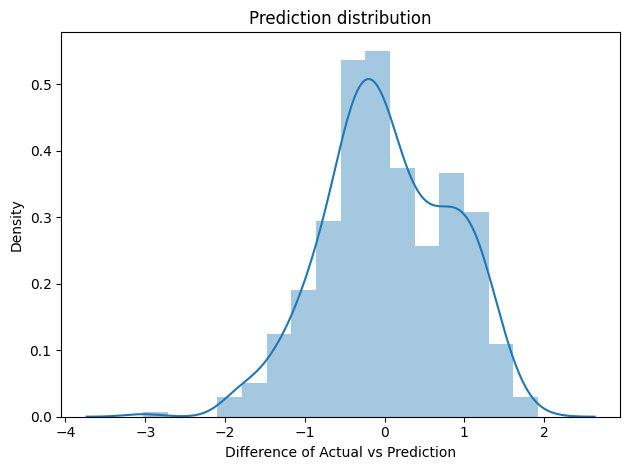

In [86]:
# establish label (y) and features (X)
X = fill_df.iloc[:,3:13].drop(columns = ['Code'])
y = fill_df['Life Ladder']

# define the model
model = Lasso()

# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# fit the train set into the model
model.fit(X_train, y_train)

# use the model to predict the test set
yhat = model.predict(X_test)
score = r2_score(y_test, yhat)
print(f'Accuracy = {score}')

# visualize the performance
sns.distplot(y_test - yhat)
plt.title('Prediction distribution')
plt.xlabel('Difference of Actual vs Prediction')

plt.tight_layout()
plt.show()

The model is doing poorly with tuning, predicting correctly for less than half of the test set, R Square is 0.52. This is very terrible and can't be used for feature selection. Now, let's try some hyper model tuning parameters to improve the model.

**Step 2:** Hyper train the model to determine the optimal tuning parameter

In [87]:
# define the model
model = Lasso()

# add the scaler to deal with different scaling features
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

# define cross-validation parameter
cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.2, random_state = 1)

param = {
    'alpha':[0.00001, 0.0001,0.001, 0.01],
    'fit_intercept':[True,False],
    'positive':[True,False],
    'selection':['cyclic','random']}

# define the new model
model = Lasso()

# define grid search parameter
search = GridSearchCV(model, param, scoring = 'neg_mean_absolute_error', n_jobs = -1, cv = cv)

# execute search
result = search.fit(X_scale, y)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -0.4111418359238876
Best Hyperparameters: {'alpha': 1e-05, 'fit_intercept': True, 'positive': False, 'selection': 'random'}


**Step 3:** Use the hyper-tuned parameter for the final model

   Model      R2     MSE     MAE
0  LASSO  0.7926  0.2776  0.4052


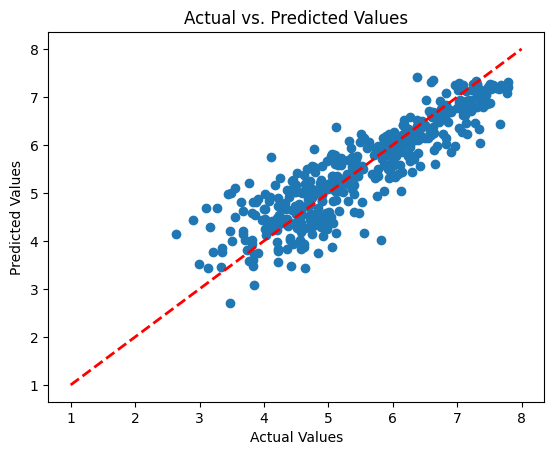

In [88]:
# define the final model
model = Lasso(alpha = 1e-05, fit_intercept = True,
              positive = False, selection = 'cyclic')

# fit the new model to the train set
model.fit(X_train, y_train)

# make prediction on test set
yhat = model.predict(X_test)

# calculate the model performance
r2_lasso = round(r2_score(y_test, yhat),4)
mse_lasso = round(mean_squared_error(y_test, yhat),4)
mae_lasso = round(mean_absolute_error(y_test, yhat),4)

print(pd.DataFrame({'Model': 'LASSO','R2': [r2_lasso],
                    'MSE': [mse_lasso], 'MAE': [mae_lasso]}))

# visualization of the new model
plt.scatter(y_test, yhat)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference
plt.plot([1,8], [1,8],
         linestyle = '--', color = 'red', linewidth = 2)

plt.show()

Now after the hyper training, we can see that model perform much better than before, with R Square equal to 0.79 and low Mean Square Error (MSE) and Mean Absolute Error (MAE) of 0.27 and 0.40 respectively.

**Step 4:** Select the features base on the LASSO result

In [89]:
# check selected feature if threshold is coefficient = 0
selected_features = X.columns[abs(model.coef_) >= 0.1]

# print selected features
for i in selected_features:
    print(f"Feature selected is: {i}")

Feature selected is: Log GDP per capita
Feature selected is: Social support
Feature selected is: Healthy life expectancy at birth
Feature selected is: Perceptions of corruption
Feature selected is: Positive affect


Now we have simplified the model from 9 features to only 5 features. We can use this simplified version to build the predicting model for the happiness score.

### **4.3. Models training and prediction**

In this section, I will fit the selected features to 2 machine learning algorithm to predict the label, `Life Ladder`, as following:
- K-Nearest Neighbour (KNN): will predict the `Life Ladder` as continuous value. 0 being the worst life satisfaction and 10 being the most ideal life satisfaction.

- Decision Tree: will predict the `Life Ladder` as categorical value. For model simplicity, we will label value in range of '0-4' as 'Not ideal', '4-7' as 'Moderate', '7-10' as 'Ideal'.

### **i. K-Nearest Neighbour (KNN)**

KNN is a simple yet effective machine learning algorithm that support regression tasks (when outcome variable is continuous value). This model is used to predict the value of a data point based on the majority average of its k nearest neighbors in the feature space. Simply, it works under the assumption that neighbour data points are likely to generate similar outcome (label variable). There are various benefits to use this methods such as non-parametric required, versatile, and very simple model that can be built on later. Below is an illustration and theoretical visualization of how the algorithm works.

*Image source: Google Image*

<img src="https://3.bp.blogspot.com/-Q-2IDgzPQgc/XBPcg6aCSeI/AAAAAAAAGM4/Zsj5jxtzyTUFdxlAg9q1cVKiq79X0xhswCLcBGAs/s1600/Screen%2BShot%2B2018-12-14%2Bat%2B22.07.56.png" alt="Drawing" style="width:256px;height:16px">

**Step 1:** Fit initial KNN model

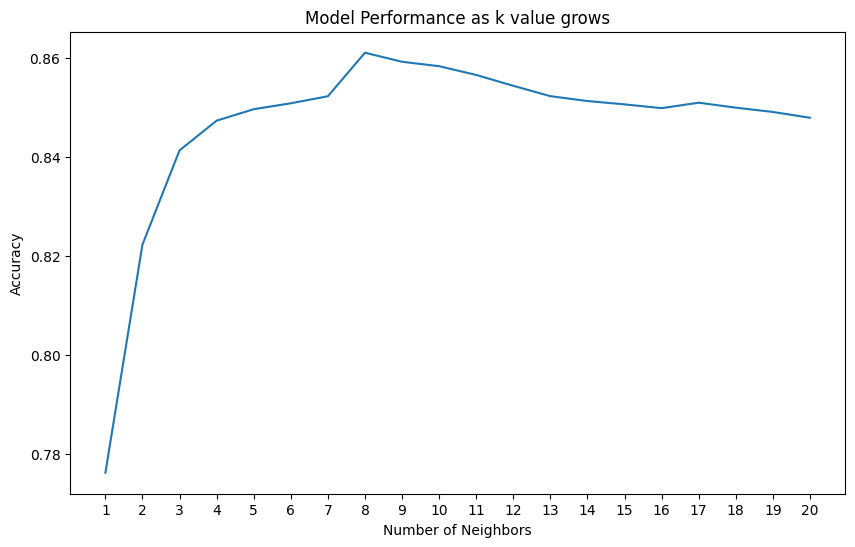

In [90]:
# define the new features (X)
X_train = pd.DataFrame(X_train, columns = X.columns)[selected_features]
X_test  = pd.DataFrame(X_test, columns = X.columns)[selected_features]

# iterate the model training for different k value
mean_acc = np.zeros(20)

for i in range(1,21):
    knn = KNeighborsRegressor(n_neighbors = i).fit(X_train,y_train)
    yhat = knn.predict(X_test)
    mean_acc[i-1] = r2_score(y_test, yhat)

# visualize the score base on k value
loc = np.arange(1,21, step = 1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.title('Model Performance as k value grows')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

plt.show()

The model seem to have the highest accuracy at 8 nearest neighbours.

**Step 2:** Perform hyperparameter tuning.

In [91]:
# define the parameter
grid_params = {'n_neighbors' : [1,3,5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

# define grid search parameter
search = GridSearchCV(KNeighborsRegressor(), grid_params, verbose = 1, cv = 5, n_jobs = -1)

# fit the training model
result = search.fit(X_train, y_train)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Score: 0.8377706816701649
Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


**Step 3:** Build the final model base on the hyperparameter.

  Model      R2     MSE     MAE
0   KNN  0.8615  0.1853  0.3139


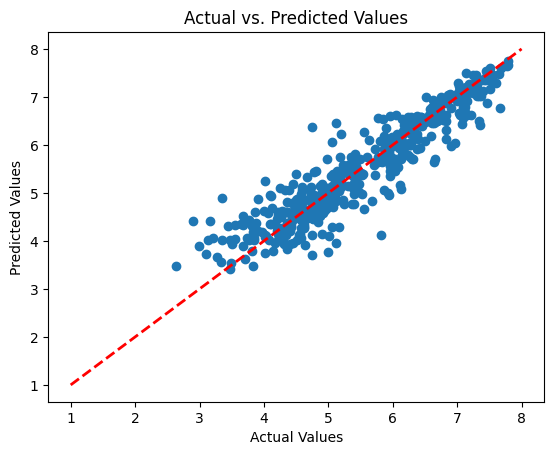

In [92]:
# define the new model
knn = KNeighborsRegressor(n_neighbors = 7, weights = 'distance',
                          metric = 'manhattan', algorithm = 'brute')

# fit the training set to the model
knn.fit(X_train, y_train)

# predict the test set using trained model
yhat = knn.predict(X_test)

# calculate the model performance
r2_knn = round(r2_score(y_test, yhat),4)
mse_knn = round(mean_squared_error(y_test, yhat),4)
mae_knn = round(mean_absolute_error(y_test, yhat),4)

print(pd.DataFrame({'Model': 'KNN','R2': [r2_knn],
                    'MSE': [mse_knn], 'MAE': [mae_knn]}))

# visualization of the new model
plt.scatter(y_test, yhat)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference
plt.plot([1,8], [1,8],
         linestyle = '--', color='red', linewidth = 2)

plt.show()

Let's plot `Life Ladder` against `Social Support` to see how the model make prediction.
We can also do the same for other feature, but for simplicity I will only plot 1 feature.

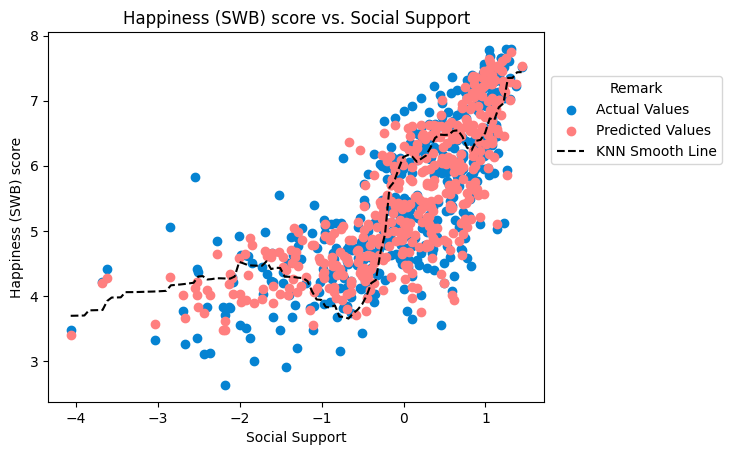

In [93]:
# plot the results (for simplicity, considering only one feature)
one_feature = X_test.iloc[:,[1]]

smooth_line_values = np.linspace(X_test.min(), X_test.max(), 100)
smooth_line_x = np.linspace(one_feature.min(), one_feature.max(), 100)
smooth_line_y = knn.predict(smooth_line_values)

plt.scatter(one_feature, y_test, label = 'Actual Values',
           color = '#0583D2', alpha = 1)
plt.scatter(one_feature, yhat, color = '#FF7F7F',
            label = 'Predicted Values', alpha = 1)

plt.plot(smooth_line_x, smooth_line_y, color = 'black',
         label = 'KNN Smooth Line', linestyle = '--')

plt.title('Happiness (SWB) score vs. Social Support')
plt.xlabel('Social Support')
plt.ylabel('Happiness (SWB) score')
plt.legend(title = 'Remark', bbox_to_anchor = (1, 0.9))
plt.show()

**Step 4:** Try the model on the full dataset

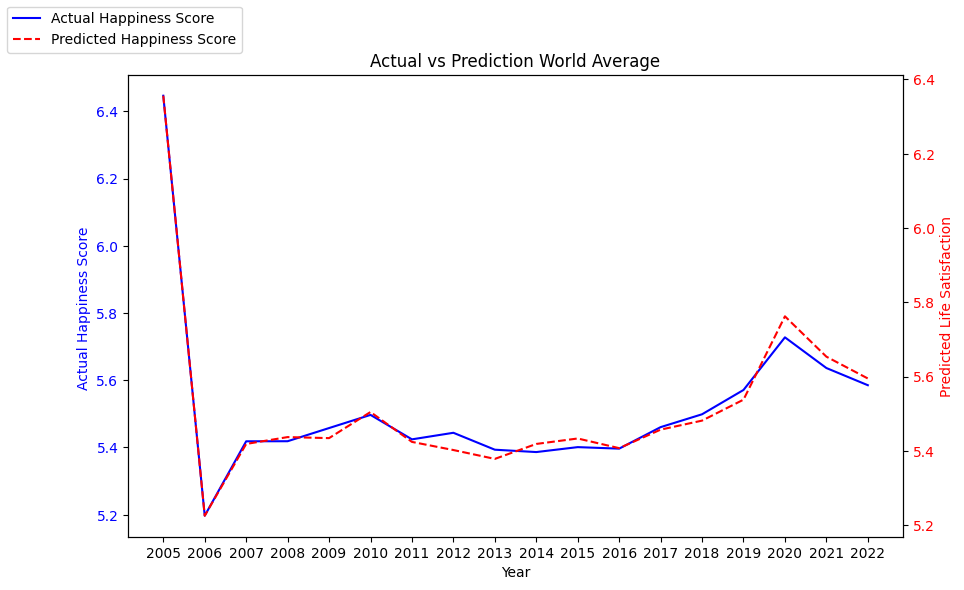

In [94]:
# use KNN model to predict the whole dataset
features = pd.DataFrame(X_scale, columns = X.columns)[selected_features]
yhat_knn = pd.DataFrame(knn.predict(features), columns = ['Prediction'])

# merge the prediction to actual dataset
label = fill_df[['Year', 'Life Ladder']]
knn_df = pd.merge(label, yhat_knn, left_index = True, right_index = True)

# plot the time series of actual vs prediction
fig, ax1 = plt.subplots(figsize=(10, 6))
df_avg = knn_df.groupby('Year').mean().reset_index()

# plot the actual trend line
ax1.plot(df_avg['Year'], df_avg['Life Ladder'], color = 'blue',
         label = 'Actual Happiness Score', alpha = 1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Actual Happiness Score ', color = 'blue')
ax1.tick_params(axis = 'y', labelcolor = 'blue')

# plot the prediction trend line
ax2 = ax1.twinx()
ax2.plot(df_avg['Year'], df_avg['Prediction'], color = 'red',
         label = 'Predicted Happiness Score', linestyle = '--', alpha = 1)
ax2.set_ylabel('Predicted Life Satisfaction', color = 'red')
ax2.tick_params(axis = 'y', labelcolor = 'red')


# add some customizations
plt.xticks(df_avg['Year'].unique(), [int(year) for year in df_avg['Year'].unique()])
fig.legend(loc = 'upper left')

plt.title('Actual vs Prediction World Average')
plt.show()

**Step 5:** Compare the prediction to actual for each continent

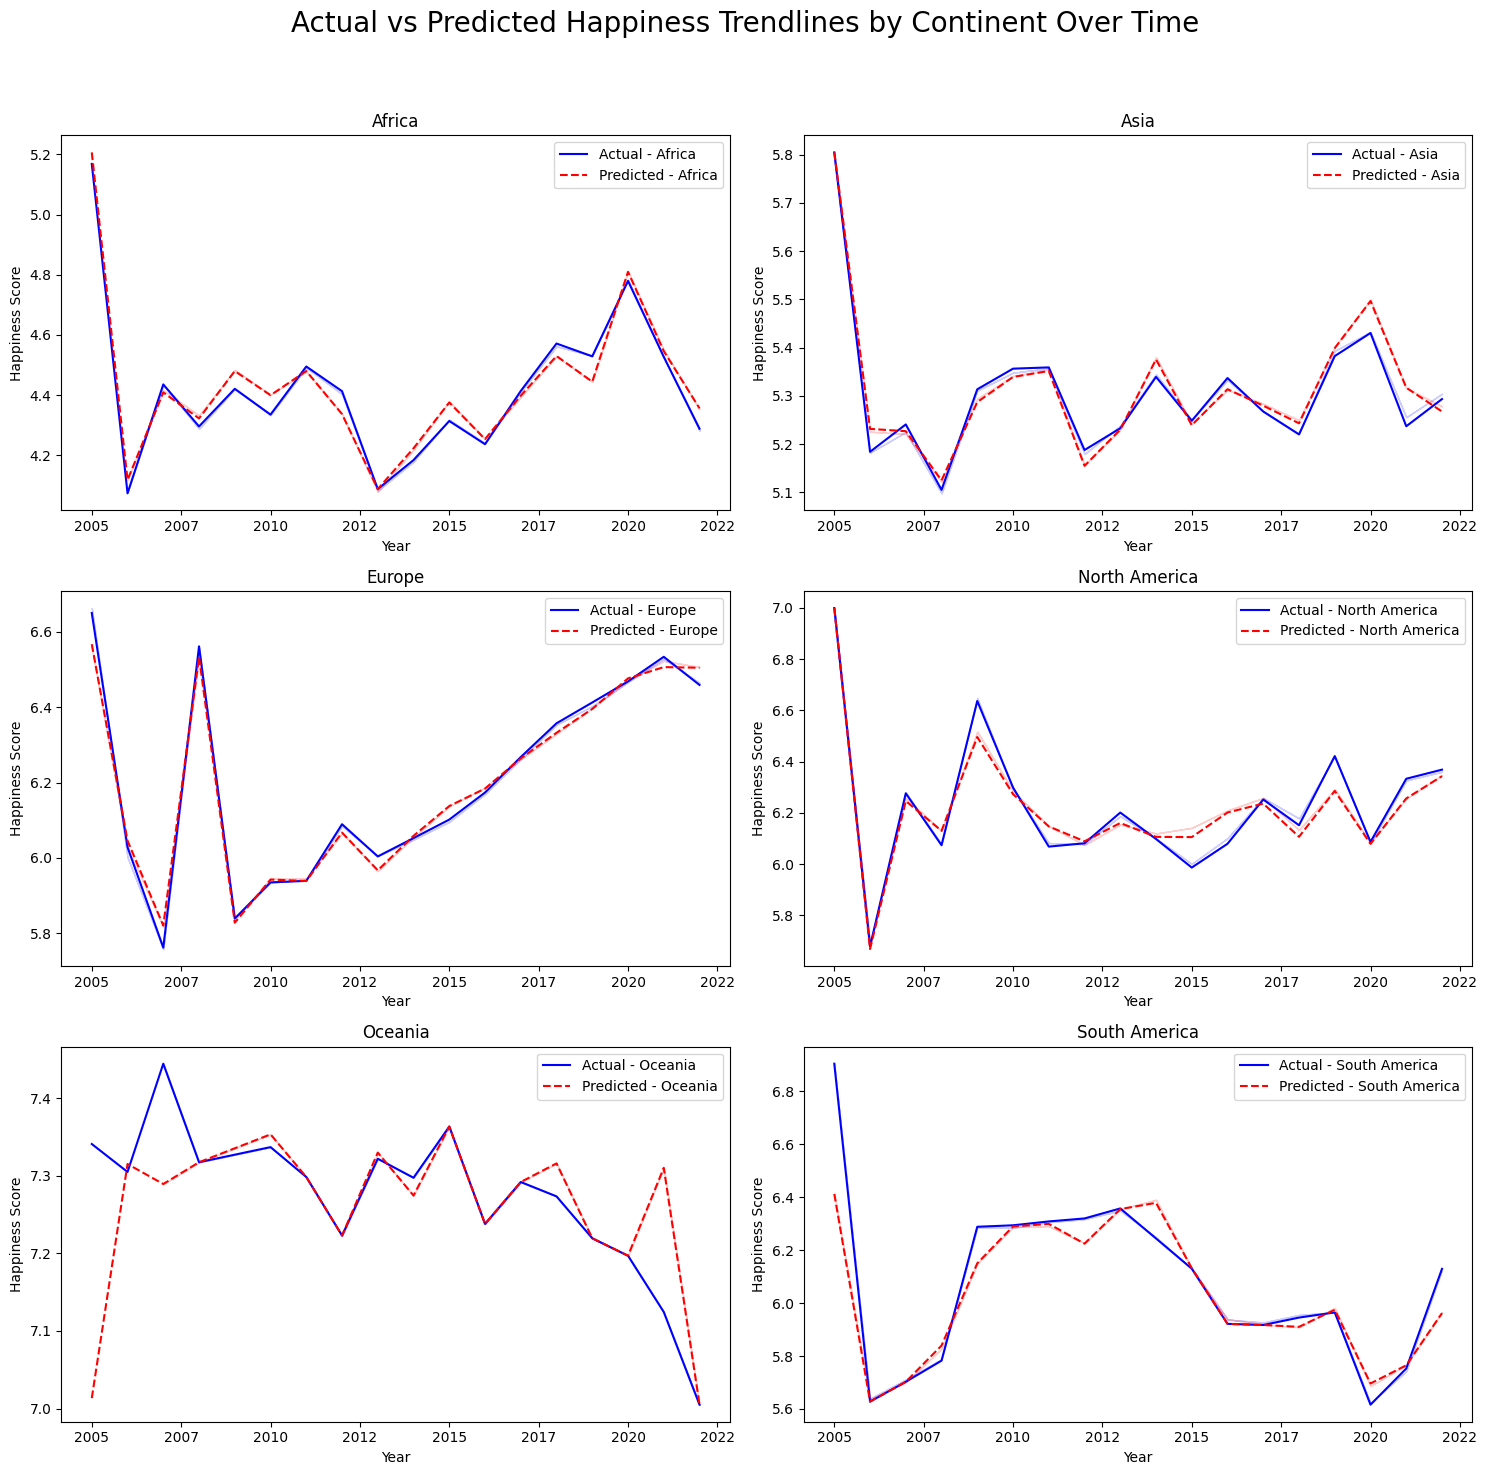

In [95]:
# merge the prediction to actual dataset
label = fill_df[['Country', 'Continent', 'Year', 'Life Ladder']]
knn_df = pd.merge(label, yhat_knn, left_index = True, right_index = True)

# create a 3x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize = (15, 15))
fig.suptitle('Actual vs Predicted Happiness Trendlines by Continent Over Time',
            fontsize = 20)

# iterate through continents and create a line plot for each subplot
for i, (continent, group) in enumerate(knn_df.groupby('Continent')):
    row, col = divmod(i, 2)
    ax = axs[row, col]

    sns.lineplot(x = 'Year', y = 'Life Ladder', ci = False, color = 'blue',
                 data = group, ax = ax, label = f'Actual - {continent}')
    sns.lineplot(x = 'Year', y = 'Prediction', ci = False, color = 'red',
                 data = group, ax = ax, label = f'Predicted - {continent}', linestyle = '--')

    ax.set_title(continent)
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
    ax.set_xlabel('Year')
    ax.set_ylabel('Happiness Score')

# add some customizations
plt.tight_layout(rect = [0, 0, 1, 0.95])
plt.show()

### **ii. Decision Tree**

Decision Tree classifier is an algorithm where the data points are splited based on features to create a tree-like structure, and each leaf (the final box) represents the final decision or prediction. Intuitively, it mimics a series of "if-else" questions, making decisions based on the input features. Decision Tree is super easy to interpret and explain as well as visualization. Moreover, this model isn't affected by different scaling and outliers, making it a suitable choice for happiness score classification. We can illustrate this algorithm as human-like thought process.

*Image source: Himani, 2022*

<img src="https://www.section.io/engineering-education/hyperparmeter-tuning/tree-one.png" alt="Drawing" style="width:256px;height:16px">

**Step 1:** Fit initial Decision Tree model

In [96]:
# label Life Ladder to categorical values
label_df = fill_df.sort_index()

bins = [0, 3, 6.5, 10]
labels = ['Not Ideal', 'Moderate', 'Ideal']

label_df['Category'] = pd.cut(label_df['Life Ladder'],
                              bins = bins, labels = labels)

# drop unneccessary columns for model training
X_tree = label_df[selected_features]
y_tree = label_df.iloc[:,[-1]]

# split the data into train and test set
X_tree_train, X_tree_test, y_tree_train, y_tree_test = train_test_split(X_tree, y_tree,
                                                                        test_size = 0.2,
                                                                        random_state = 1)

# define the model and fit the train set
dtree = DecisionTreeClassifier()
dtree.fit(X_tree_train, y_tree_train)

DecisionTreeClassifier()

**Step 2:** Evaluate the initial model

Prediction Accuracy for train set: 1.0
Prediction Accuracy for test set: 0.8977272727272727


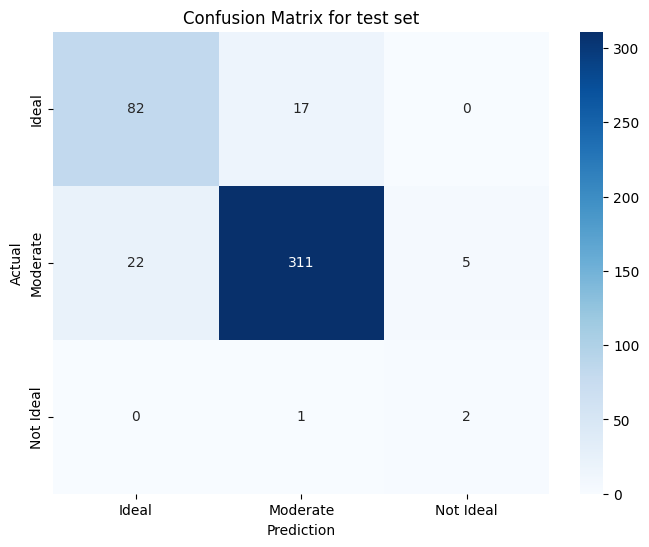

In [97]:
# predict the happiness category
yhat_train = dtree.predict(X_tree_train)
yhat_test = dtree.predict(X_tree_test)

# calculate the model performance
print(f'Prediction Accuracy for train set: {accuracy_score(y_tree_train, yhat_train)}')
print(f'Prediction Accuracy for test set: {accuracy_score(y_tree_test, yhat_test)}')

# prepare the datafrme for visualization
conf_matrix = confusion_matrix(y_tree_test, yhat_test)
unique_labels = sorted(label_df['Category'].unique())
class_names = {label: name for label, name in zip(unique_labels, unique_labels)}

conf_matrix_df = pd.DataFrame(conf_matrix, index = unique_labels, columns = unique_labels)
conf_matrix_df.rename(index = class_names, columns = class_names, inplace = True)

# visualize confusion matrix with a heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix_df, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix for test set')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

The model without any hypertuning has accuracy of 1 for train set, which could mean there is overfitting and the model became too complicated. This is reflected when I try the model on the test set, the accuracy rate drop by almost 20%. Let's try hyperparameter tuning to reduce complexity and prevent overfitting.

**Step 3:** Perform hyperparameter tuning

In [98]:
# redefine the model
dtree = DecisionTreeClassifier()

# define parameter for gridsearch
params = {'max_depth': [2, 3, 5, 7, 10, 15, 20],
          'min_samples_leaf': [2, 3, 4, 5, 6, 10, 50, 100],
          'criterion': ["gini", "entropy"]}

# start the grid search
grid_search = GridSearchCV(estimator = dtree, param_grid = params, cv = 4,
                           n_jobs = -1, verbose = 1, scoring = "accuracy")

# fit the train data to grid search
result = grid_search.fit(X_tree_train, y_tree_train)

# # print result
# score_df = pd.DataFrame(grid_search.cv_results_)
# score_df.head()

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 4 folds for each of 112 candidates, totalling 448 fits
Best Score: 0.9181442845309589
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2}


**Step 4:** Retrain the model using the hyperparameter

In [99]:
# define the new model
dtree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5,
                              min_samples_leaf = 2)

# fit the train model
dtree.fit(X_tree_train, y_tree_train)

# make prediction on the test set
yhat_tree = dtree.predict(X_tree_test)
r2_tree = accuracy_score(y_tree_test, yhat_tree)
print(f'Prediction Accuracy for test set: {r2_tree}')

Prediction Accuracy for test set: 0.9136363636363637


**Step 5:** Visualize the new model decision tree

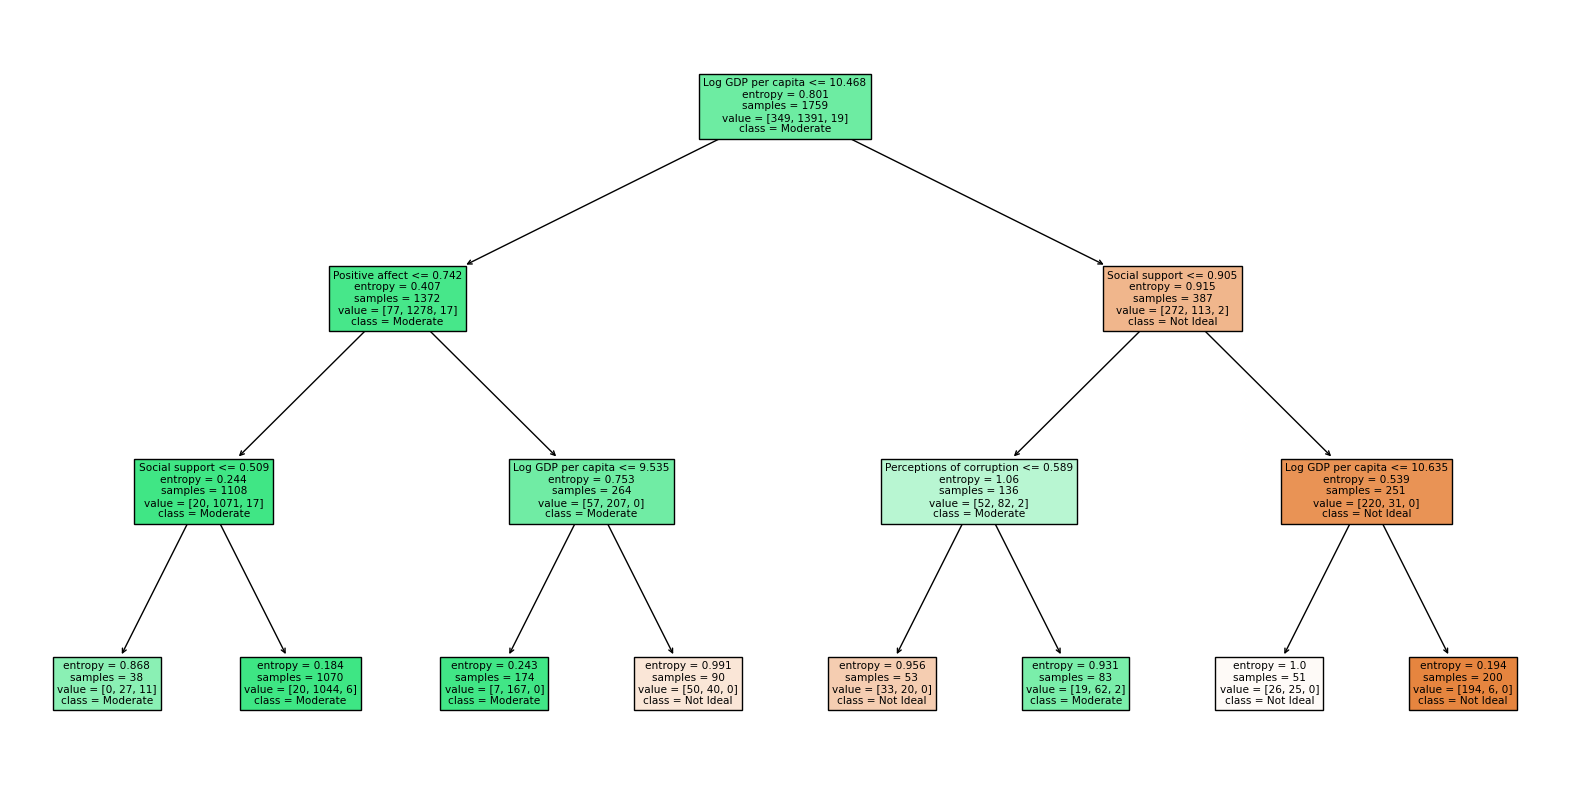

In [100]:
# build a 3 depth decision tree (5 depth is hard to illustrate)
# define the new model
tree_plot = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3,
                              min_samples_leaf = 2)

# fit the train model
tree_plot.fit(X_tree_train, y_tree_train)

fig = plt.figure(figsize = (20, 10))
_ = tree.plot_tree(tree_plot, feature_names = list(X_tree.columns),
                   class_names = labels, filled = True)

**Step 6:** fit the whole dataset

The prediction score for whole dataset: 0.9390632105502501.


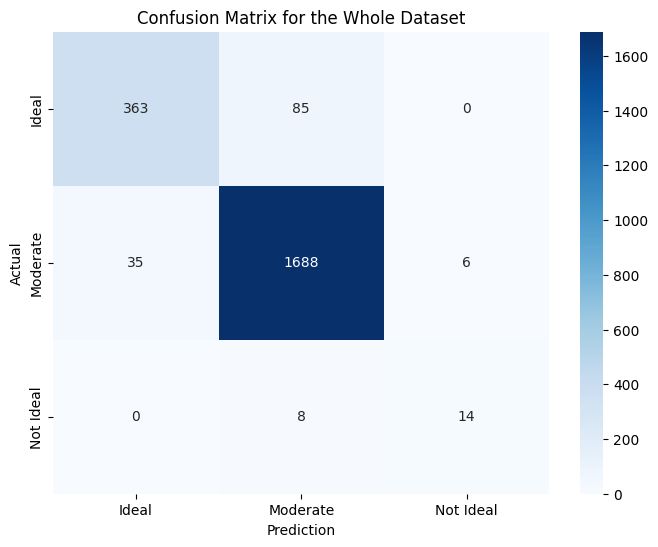

In [101]:
# make the prediction on whole dataset
yhat_tree = dtree.predict(X_tree)

# make confusion table
conf_matrix = confusion_matrix(y_tree, yhat_tree)
conf_matrix_df = pd.DataFrame(conf_matrix, index = unique_labels, columns = unique_labels)
conf_matrix_df.rename(index = class_names, columns = class_names, inplace = True)

# print prediction score
tree_score = accuracy_score(y_tree, yhat_tree)
print(f'The prediction score for whole dataset: {tree_score}.')
# visualize the confusion table
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix_df, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix for the Whole Dataset')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

The model seem to be stable for the train set, test set, and whole dataset as the accuracy doesn't significantly change when the different values of features being fit into.

## **5. Conclusion**

In [102]:
# summary of the model trained and prediction performance
result_dict = {'Model': ['LASSO', 'KNN Regressor', 'Decision Tree'],
               'R Squred': [r2_lasso, r2_knn, r2_tree]}
result_df = pd.DataFrame(result_dict)

# selected features
print(f'{list(selected_features)}')

result_df

['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Perceptions of corruption', 'Positive affect']


,Model,R Squred
0,LASSO,0.792600
1,KNN Regressor,0.861500
2,Decision Tree,0.913636


In this study, I deploy machine learning approaches to World Happiness Report 2023 dataset in an attempt to predict the happiness (SWB) score of countries around world. Using LASSO approach, I was able to reduce some weak predictors pre-determined by WHR 2023. Based on this study, the important predictors are GDP per capita, Social support, Healthy life expectancy at birth, Perceptions of corruption, and Positive affect. Using the remaining features, I trained 1 regression model (KNN) and 1 classifier model (Decision Tree). The regression model KNN able to make prediction with precision of 86%. This model is suitable to make prediction of happiness score from a scale of 0-10 to decimals precision. On the other hand, classifier 'Decision Tree' can make prediction more than 90% precision. This model is suitable to make prediction on happiness categories such as ideal, moderate, and not ideal happiness.

## **6 Prediction Application**

In [105]:
# # load the user input interface
# if __name__ == "__main__":
#     main()

## **7. References**